# **Лабораторная работа №3 по вычислительной математикe.**

## Работу выполнил: Аль Мажариш Гасем, Б01 - 202а.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Формулировка задачи

Посчитать интеграл:

$\int_{0}^{1} \sin{x^2} dx $

- Методом правых квадратов, средних квадратов, Симпсона
- Определить порядок каждого метода

In [2]:
def f(x):
    return np.sin(x ** 2)  # функция для интегрирования
    
a = 0  # начало интервала
b = 1  # конец интервала
n = 20  # количество отрезков для примера
ans = 0.310268301723  # ответ

## Правильный ответ

$\int_{0}^{1} \sin{x^2} dx = \sqrt{\frac{\pi}{2}} S(\sqrt{\frac{2}{\pi}}) = 0.310268301723$

(((посчитано с помощью wolfram.alpha и проверено калькулятором)))

## Метод правых и центральных прямоугольников

In [3]:
def right_rectangle_method(a, b, n):
    h = (b - a) / n 
    x = np.linspace(a, b - h, n)
    return np.sum(f(x + h) * h)  

def central_rectangle_method(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b - h, n)
    return np.sum(f(x + h / 2) * h) 

def right_rectangle_mistake(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, 1000)
    return (h * (b - a) * max(abs(2 * np.cos(x)))) / 2

def central_rectangle_mistake(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, 1000)
    return (h * h * (b - a) * max(abs(-4 * np.sin(x)))) / 24

## Метод Симпсона

In [4]:
def simpson_method(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b - h, n)
    return h/6 * np.sum(f(x) + 4 * f(x + h / 2) + f(x + h)) 

def simpson_method_mistake(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, 1000)
    return (h ** 4 * (b - a) * max(abs(16 * np.sin(x)))) / 180

## Вычисление интегралов

In [10]:
integral_right, right_mistake = right_rectangle_method(a, b, n), right_rectangle_mistake(a, b, n)
integral_central, central_mistake = central_rectangle_method(a, b, n), central_rectangle_mistake(a, b, n)
integral_simpson, simpson_mistake = simpson_method(a, b, n), simpson_method_mistake(a, b, n)

print(f"Интеграл методом правых прямоугольников: {integral_right} +/- {right_mistake}")
print(f"Интеграл методом центральных прямоугольников: {integral_central} +/- {central_mistake}")
print(f"Интеграл методом Симпсона: {integral_simpson} +/- {simpson_mistake}")
print("\n")
print(f"Фактическая ошибка методом правых прямоугольников: {integral_right - ans}")
print(f"Фактическая ошибка методом центральных прямоугольников: {integral_central - ans}")
print(f"Фактическая ошибка методом Симпсона: {integral_simpson - ans}")

Интеграл методом правых прямоугольников: 0.3315303275235111 +/- 0.05
Интеграл методом центральных прямоугольников: 0.3101556291720211 +/- 0.00035061291033662367
Интеграл методом Симпсона: 0.3102682704157853 +/- 4.674838804488315e-07


Фактическая ошибка методом правых прямоугольников: 0.021262025800511064
Фактическая ошибка методом центральных прямоугольников: -0.00011267255097890949
Фактическая ошибка методом Симпсона: -3.130721470956388e-08


## Визуализация методов

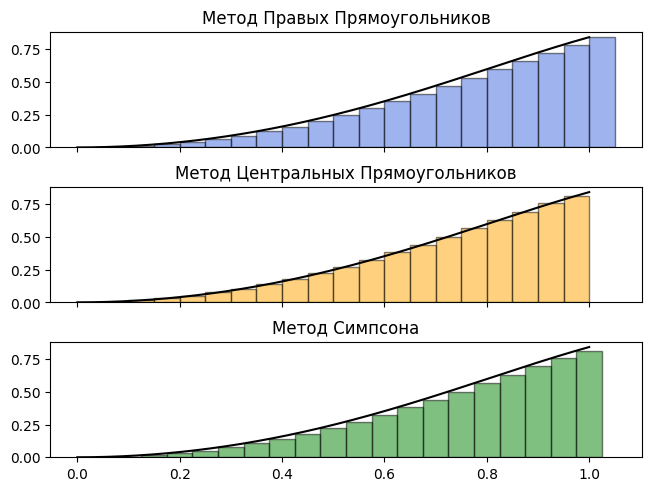

In [6]:
# Визуализация
x = np.linspace(a, b, 1000)
y = f(x)

# Узлы для построения прямоугольников
x_rect = np.linspace(a, b - (b - a) / n, n)
h = (b - a) / n

# Построение графиков
fig, axs = plt.subplots(3, sharex=True, sharey=True, layout="constrained")
axs[0].plot(x, y, label="f(x) = sin(x)", color="black")
axs[1].plot(x, y, label="f(x) = sin(x)", color="black")
axs[2].plot(x, y, label="f(x) = sin(x)", color="black")

# Метод правых прямоугольников
for i in range(n):
    axs[0].bar(x_rect[i] + h, f(x_rect[i] + h), width=h, align='edge', color='royalblue', edgecolor='black', alpha=0.5)

# Метод центральных прямоугольников
for i in range(n):
    axs[1].bar(x_rect[i] + h / 2, f(x_rect[i] + h / 2), width=h, align='center', color='orange', edgecolor='black', alpha=0.5)

# Метод Симпсона
for i in range(n):
    axs[2].bar(x_rect[i] + h, (f(x_rect[i]) + 4 * f(x_rect[i] + h / 2) + f(x_rect[i] + h)) / 6, width=h, align='center', color='green', edgecolor='black', alpha=0.5)
axs[0].set_title('Метод Правых Прямоугольников')
axs[1].set_title('Метод Центральных Прямоугольников')
axs[2].set_title('Метод Симпсона')

plt.show()

## Определим порядок каждого метода

Для этого построим график ошибки в зависимости от мелкости разбиения в логарифмическом масштабе, полученную зависимость аппроксимируем прямой и по её наклону определим порядок каждого метода.

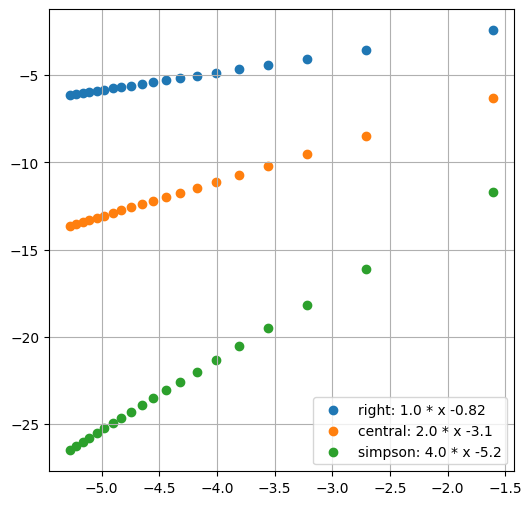

In [7]:
nms = [i for i in range(5, 200, 10)]  # Задаём массив разных разбиений
right_pow = []
central_pow = []
simpson_pow = []

for i in nms:
    right_pow.append(abs(right_rectangle_method(a, b, int(i)) - ans))
    central_pow.append(abs(central_rectangle_method(a, b, int(i)) - ans))
    simpson_pow.append(abs(simpson_method(a, b, int(i)) - ans)) 

# произведём линейную регрессию
a_r, b_r = np.polyfit(-np.log(nms), np.log(right_pow), 1)
a_c, b_c = np.polyfit(-np.log(nms), np.log(central_pow), 1)
a_s, b_s = np.polyfit(-np.log(nms), np.log(simpson_pow), 1)

# Построим график
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(-np.log(nms), np.log(right_pow), label=f"right: {a_r:.2} * x {b_r:.2}")
ax.scatter(-np.log(nms), np.log(central_pow), label=f"central: {a_c:.2} * x {b_c:.2}")
ax.scatter(-np.log(nms), np.log(simpson_pow), label=f"simpson: {a_s:.2} * x {b_s:.2}")

ax.legend()
ax.grid()
plt.show()

## Выводы

- Каждый из методов дал удовлетворитеьную оценку интеграла при количестве разбиений n = 20. Как и ожидалось, чем выше порядок метода интегрирования, тем точнее результат и меньше прогрешность.

- С помощью линейной регресси практически определили порядок каждого метода и получили совпадения с теоретическими ожиданиями.